# Ejercicio perdidos en el espacio.

    El objetivo de este ejercicio es hallar la aceleración de la gravedad en 2 situaciones diferentes dejando caer una pelota. 
    
    Se miden la longitud de la caida y el tiempo que tarda en caer en los dos casos:
        ·Caso 1:
    L=1.00 m y t=0.46 s.
        ·Caso 2: 
    L=2.00 m y t=0.66 s. 
    
    Se aplican las fórmulas correspondientes para obtener los valores experimentales de g y sus errores y se comparan estos valores con los de una tabla para identificar el planeta más cercano.

In [74]:
# importamos las librerias necesarias
import pandas as pd
import faker as fk
import random as rd
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import sympy as sp
import seaborn as sns

In [75]:
planetas = {
    "Tierra": 9.8,
    "Marte": 3.7,
    "Júpiter": 24.8,
    "Saturno": 9.0,
    "Urano": 8.7,
    "Neptuno": 11.0
}

In [76]:
# Para el apartado A
L1 = 1.00
t1 = 0.46
g_a = 2*L1 / (t1**2)
print("La aceleración de la gravedad es: ", g_a)

La aceleración de la gravedad es:  9.45179584120983


In [77]:
# Para el apartado B
L2 = 2.00
t2 = 0.66
g_b = 2*L2 / (t2**2)
print("La aceleración de la gravedad es: ", g_b)

La aceleración de la gravedad es:  9.182736455463727


In [78]:
# creamos un dataframe con los datos
df = pd.DataFrame({
    'Longitud': [L1, L2],
    'Tiempo': [t1, t2],
    'Gravedad': [g_a, g_b],
    'Planeta más cercano': ['Tierra', 'Saturno'],
    '2ndo más cercano': ['Saturno', 'Tierra']},index= ['Escenario A', 'Escenario B'])
df

,Longitud,Tiempo,Gravedad,Planeta más cercano,2ndo más cercano
Escenario A,1.0,0.46,9.451796,Tierra,Saturno
Escenario B,2.0,0.66,9.182736,Saturno,Tierra


In [79]:
def calcular_error(L, t):
    L_simbolo, t_simbolo = sp.symbols('L t')
    g_calculada_simbolo = (2*L_simbolo) / (t_simbolo**2)
    
    derivada_parcial_L = sp.diff(g_calculada_simbolo, L_simbolo)
    derivada_parcial_t = sp.diff(g_calculada_simbolo, t_simbolo)
    
    error_L = 0.01
    error_t = 0.01
    
    error_g_calculada = sp.sqrt((derivada_parcial_L * error_L)**2 + (derivada_parcial_t * error_t)**2)
    
    return float(error_g_calculada.subs({L_simbolo: L, t_simbolo: t}))

    

In [80]:
fake = fk.Faker()

def generar_datos(planetas, L_objetivo, t_objetivo):
    L = round(rd.uniform(L_objetivo - 0.1, L_objetivo + 0.1), 2)
    t = round(rd.uniform(t_objetivo - 0.1, t_objetivo + 0.1), 2)
    g_calculada = round((2*L) / (t**2), 2)

    diferencia_minima = float('inf')
    planeta_mas_cercano = ''
    
    diferencia_minima_2 = float('inf')
    segundo_planeta_mas_cercano = ''

    for planeta, gravedad in planetas.items():
        diferencia = abs(gravedad - g_calculada)
        if diferencia < diferencia_minima:
            diferencia_minima = diferencia
            planeta_mas_cercano = planeta
    
    for planeta, gravedad in planetas.items():
        if planeta != planeta_mas_cercano:
            diferencia = abs(gravedad - g_calculada)
            if diferencia < diferencia_minima_2:
                diferencia_minima_2 = diferencia
                segundo_planeta_mas_cercano = planeta
    
    error_g_calculada = calcular_error(L, t)
    error_porcentaje = (error_g_calculada / g_calculada) * 100
    
    return {
        'Id': fake.uuid4(),
        'Longitud (m)': L,
        'Tiempo (s)': t,
        'Gravedad (m/s^2)': g_calculada,
        'Planeta más cercano': planeta_mas_cercano,
        'Segundo Planeta más cercano': segundo_planeta_mas_cercano,
        'Error Gravedad (m/s^2)': error_g_calculada,
        'Error Porcentaje (%)': error_porcentaje
    }

df_a = pd.DataFrame([generar_datos(planetas, L1, t1) for _ in range(1000)])
df_a



,Id,Longitud (m),Tiempo (s),Gravedad (m/s^2),Planeta más cercano,Segundo Planeta más cercano,Error Gravedad (m/s^2),Error Porcentaje (%)
0,c2c4b7b9-91ae-428a-83f1-db09de044a93,1.05,0.39,13.81,Neptuno,Tierra,0.720143,5.214647
1,527fd8a5-c540-40ec-b27f-c79a439ed7bb,0.99,0.56,6.31,Urano,Marte,0.234337,3.713744
2,94987011-5e5f-4970-9b65-d210ae95da5e,0.95,0.54,6.52,Urano,Saturno,0.250882,3.847889
3,d62745e5-9e78-4a63-b091-f83f69aff4c0,0.93,0.51,7.15,Urano,Saturno,0.290786,4.066936
4,e0d86356-074c-4c21-8fd2-b8142762d1b9,1.08,0.45,10.67,Neptuno,Tierra,0.484253,4.538452
...,...,...,...,...,...,...,...,...
995,75cc1dd7-5f49-456d-a0b6-7a09b6a8c6cd,0.96,0.42,10.88,Neptuno,Tierra,0.530558,4.876456
996,1011cbfb-c8e5-4ce8-9e6d-44fec0a8dab5,1.01,0.50,8.08,Urano,Saturno,0.332954,4.120715
997,d98ef8c2-1c86-47fe-92e6-17c2d272fa9a,0.96,0.39,12.62,Neptuno,Tierra,0.660567,5.234288
998,2a248c5f-88dd-49db-9479-3e8e0fefb5c7,0.94,0.38,13.02,Neptuno,Tierra,0.699089,5.369345


In [81]:
df_b = pd.DataFrame([generar_datos(planetas, L2, t2) for _ in range(1000)])
df_b

,Id,Longitud (m),Tiempo (s),Gravedad (m/s^2),Planeta más cercano,Segundo Planeta más cercano,Error Gravedad (m/s^2),Error Porcentaje (%)
0,f7d11225-0e2c-465b-9837-8b53f5845e71,1.97,0.67,8.78,Urano,Saturno,0.265761,3.026896
1,eb1dfca7-0192-44f7-9e12-ff4e516e54b0,1.93,0.64,9.42,Tierra,Saturno,0.298515,3.168950
2,4079c7a0-b7bf-43a6-95f9-857309e3475c,2.06,0.69,8.65,Urano,Saturno,0.254324,2.940157
3,68a035c9-6152-4d56-af8c-e9f8b456bc33,1.97,0.72,7.60,Urano,Saturno,0.214616,2.823893
4,da56385a-79a8-47dc-b6b1-44cf003c0201,2.06,0.62,10.72,Neptuno,Tierra,0.349635,3.261520
...,...,...,...,...,...,...,...,...
995,0d6a2375-0fbd-4312-9218-52c6241331ca,2.07,0.64,10.11,Tierra,Neptuno,0.319609,3.161314
996,6842be78-2f79-4628-a500-4c8bb278eb65,1.94,0.61,10.43,Neptuno,Tierra,0.346078,3.318103
997,e55ec7dd-3922-47a4-ab8f-e71baf5f66fb,1.91,0.67,8.51,Urano,Saturno,0.257898,3.030531
998,878977bc-0e49-4fa8-9611-53da6e5d3aae,1.96,0.70,8.00,Urano,Saturno,0.232187,2.902339


In [82]:
def analizar_dataframe(df):
    
    print('\n --> Estadisticas descriptivas:')
    print(df.describe())
    
    print('\n --> Estos son los histogramas para cada variable:')
    df.hist(column=['Longitud (m)', 'Tiempo (s)', 'Gravedad (m/s^2)'])
    plt.show()
    
    print('\n --> Este es el gráfico de dispersión:')
    plt.scatter(df['Longitud (m)'], df['Tiempo (s)'])
    plt.xlabel('Longitud (m)')
    plt.ylabel('Tiempo (s)')
    plt.show()

    # codificar etiquetas de planetas
    codificador_etiquetas = LabelEncoder()
    df['Planeta más cercano (codigo)'] = codificador_etiquetas.fit_transform(df['Planeta más cercano'])
    df['Segundo Planeta más cercano (codigo)'] = codificador_etiquetas.fit_transform(df['Segundo Planeta más cercano'])

    print('\n --> Estos son los datos de las correlaciones:')
    df_numeric = df.select_dtypes(include=[np.number])
    print(df_numeric.corr())
    print('\n --> Este es el mapa de calor de correlaciones:')
    sns.heatmap(df_numeric.corr(), annot=True)
    plt.show()
    
    print('\n --> Este es el gráfico de regresión lineal:')
    X = df['Longitud (m)'].values.reshape(-1, 1)
    y = df['Tiempo (s)'].values.reshape(-1, 1)

    regresion_lineal = LinearRegression()
    regresion_lineal.fit(X, y)

    y_pred = regresion_lineal.predict(X)
    plt.scatter(X, y, color='blue') 
    plt.plot(X, y_pred, color='red')
    plt.xlabel('Longitud (m)')
    plt.ylabel('Tiempo (s)')
    plt.show()


def contar_planetas(dataframe):
    conteo_planetas = dataframe['Planeta más cercano'].value_counts()
    
    planeta_mas_cercano_nave = conteo_planetas.idxmax()
    
    conteo_planetas_2 = dataframe['Segundo Planeta más cercano'].value_counts()
    
    segundo_planeta_mas_cercano_nave = conteo_planetas_2.idxmax()
    
    return conteo_planetas, planeta_mas_cercano_nave, conteo_planetas_2, segundo_planeta_mas_cercano_nave


 --> Estadisticas descriptivas:
       Longitud (m)   Tiempo (s)  Gravedad (m/s^2)  Error Gravedad (m/s^2)   
count   1000.000000  1000.000000        1000.00000             1000.000000  \
mean       0.996520     0.460620           9.86064                0.460354   
std        0.056767     0.057678           2.60984                0.177626   
min        0.900000     0.360000           5.74000                0.214684   
25%        0.950000     0.410000           7.60000                0.308165   
50%        0.995000     0.460000           9.50000                0.423171   
75%        1.040000     0.510000          11.79000                0.584251   
max        1.100000     0.560000          16.98000                0.955616   

       Error Porcentaje (%)  
count           1000.000000  
mean               4.527687  
std                0.550001  
min                3.688194  
25%                4.041997  
50%                4.462321  
75%                4.984167  
max                5.665

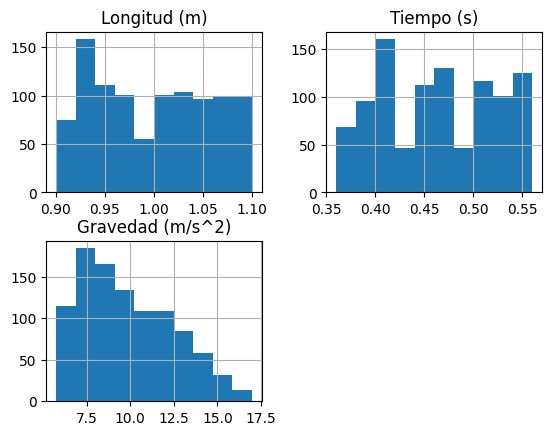


 --> Este es el gráfico de dispersión:


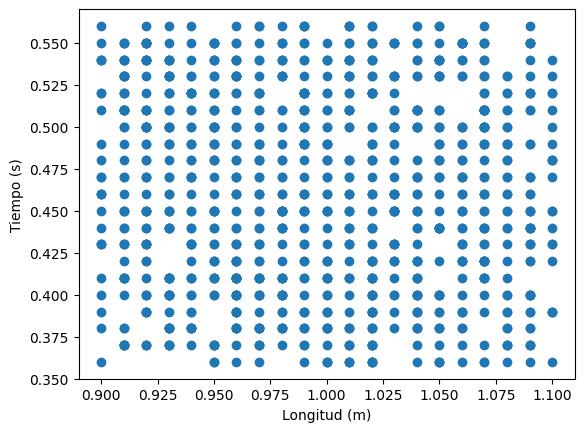


 --> Estos son los datos de las correlaciones:
                                      Longitud (m)  Tiempo (s)   
Longitud (m)                              1.000000   -0.025908  \
Tiempo (s)                               -0.025908    1.000000   
Gravedad (m/s^2)                          0.234352   -0.961781   
Error Gravedad (m/s^2)                    0.158861   -0.963829   
Error Porcentaje (%)                     -0.000861   -0.992839   
Planeta más cercano (codigo)             -0.070278    0.777444   
Segundo Planeta más cercano (codigo)      0.055095   -0.493197   

                                      Gravedad (m/s^2)   
Longitud (m)                                  0.234352  \
Tiempo (s)                                   -0.961781   
Gravedad (m/s^2)                              1.000000   
Error Gravedad (m/s^2)                        0.995535   
Error Porcentaje (%)                          0.968972   
Planeta más cercano (codigo)                 -0.780355   
Segundo Planeta m

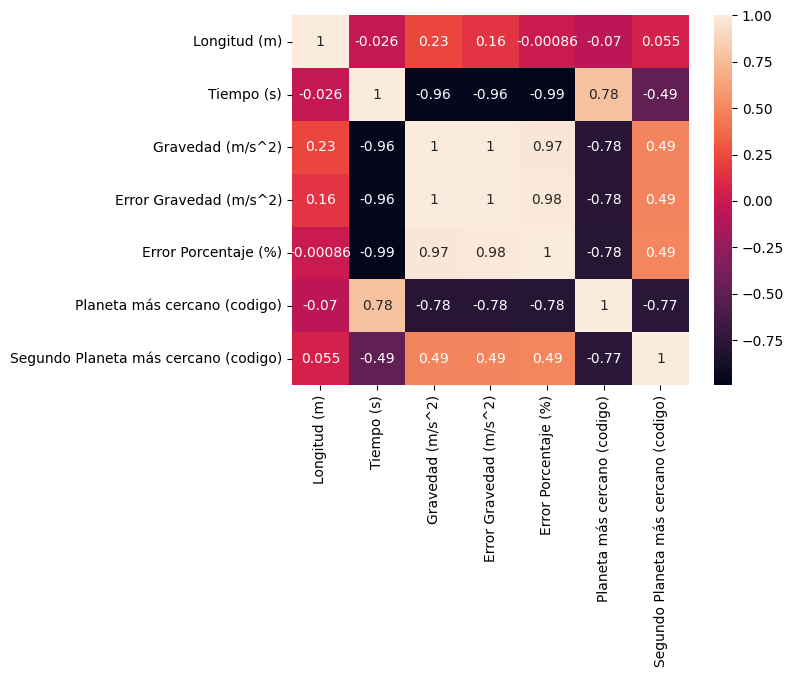


 --> Este es el gráfico de regresión lineal:


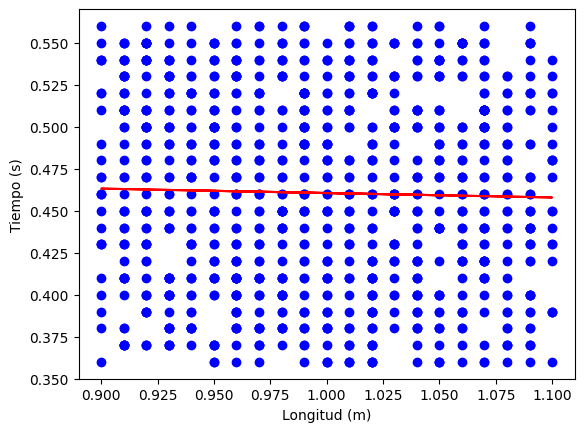

Planeta más cercano
Urano      408
Neptuno    390
Tierra     119
Saturno     62
Marte       21
Name: count, dtype: int64

El planeta donde se encuentra la nave es : Urano porque es el planeta más cercano.
El segundo planeta más cercano a la nave es: Saturno


In [83]:
analizar_dataframe(df_a)
conteo_planetas_a, planeta_mas_cercano_nave_a, conteo_planetas_2_a, segundo_planeta_mas_cercano_nave_a = contar_planetas(df_a)

print(conteo_planetas_a)
print(f'\nEl planeta donde se encuentra la nave es : {planeta_mas_cercano_nave_a} porque es el planeta más cercano.')
print(f'El segundo planeta más cercano a la nave es: {segundo_planeta_mas_cercano_nave_a}')


 --> Estadisticas descriptivas:
       Longitud (m)   Tiempo (s)  Gravedad (m/s^2)  Error Gravedad (m/s^2)   
count   1000.000000  1000.000000       1000.000000             1000.000000  \
mean       2.000950     0.661130          9.372340                0.294021   
std        0.057111     0.058002          1.686976                0.078249   
min        1.900000     0.560000          6.580000                0.176559   
25%        1.950000     0.610000          7.910000                0.225726   
50%        2.000000     0.660000          9.090000                0.278882   
75%        2.050000     0.710000         10.805000                0.356905   
max        2.100000     0.760000         13.390000                0.482549   

       Error Porcentaje (%)  
count           1000.000000  
mean               3.089823  
std                0.266953  
min                2.673556  
25%                2.860211  
50%                3.070618  
75%                3.315749  
max                3.610

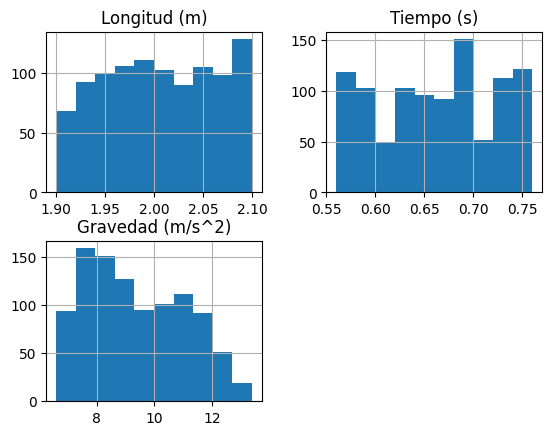


 --> Este es el gráfico de dispersión:


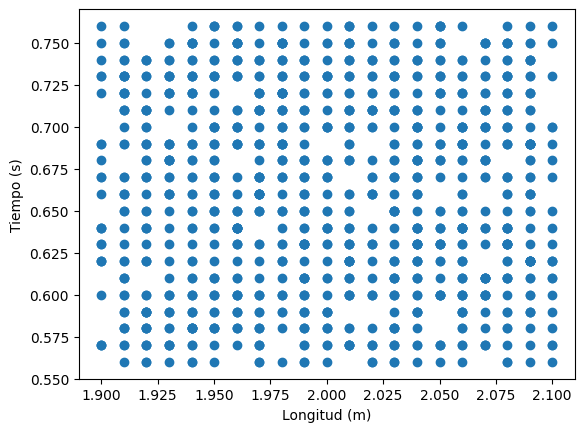


 --> Estos son los datos de las correlaciones:
                                      Longitud (m)  Tiempo (s)   
Longitud (m)                              1.000000   -0.002591  \
Tiempo (s)                               -0.002591    1.000000   
Gravedad (m/s^2)                          0.156109   -0.981048   
Error Gravedad (m/s^2)                    0.100041   -0.982904   
Error Porcentaje (%)                     -0.009721   -0.996771   
Planeta más cercano (codigo)             -0.090565    0.886643   
Segundo Planeta más cercano (codigo)      0.009113   -0.468940   

                                      Gravedad (m/s^2)   
Longitud (m)                                  0.156109  \
Tiempo (s)                                   -0.981048   
Gravedad (m/s^2)                              1.000000   
Error Gravedad (m/s^2)                        0.997658   
Error Porcentaje (%)                          0.985083   
Planeta más cercano (codigo)                 -0.898815   
Segundo Planeta m

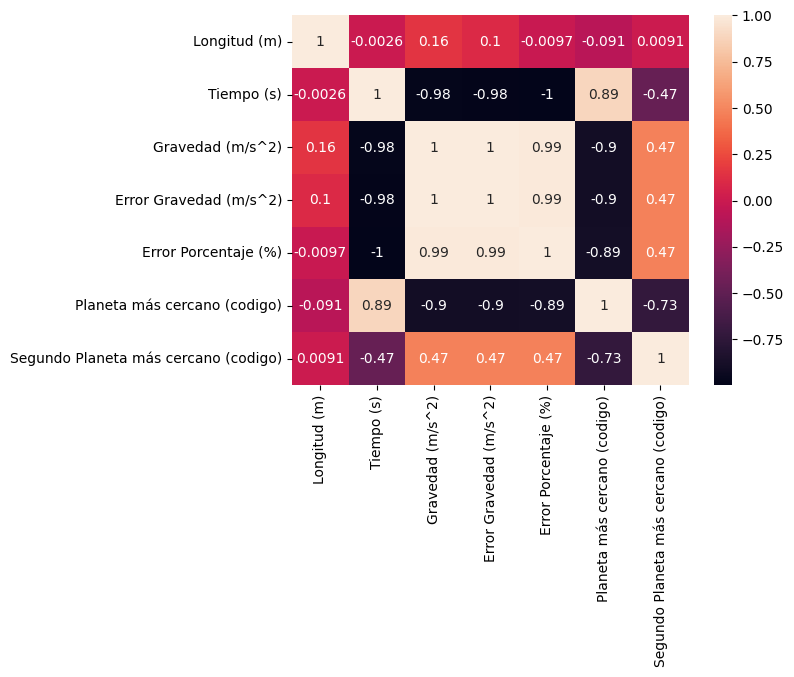


 --> Este es el gráfico de regresión lineal:


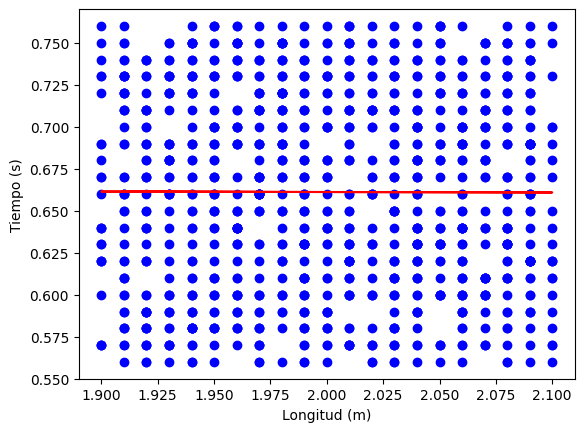

Planeta más cercano
Urano      454
Neptuno    309
Tierra     143
Saturno     94
Name: count, dtype: int64

El planeta donde se encuentra la nave es : Urano porque es el planeta más cercano.
El segundo planeta más cercano a la nave es: Saturno


In [84]:
analizar_dataframe(df_b)
conteo_planetas_b, planeta_mas_cercano_nave_b, conteo_planetas_2_b, segundo_planeta_mas_cercano_nave_b = contar_planetas(df_b)

print(conteo_planetas_b)
print(f'\nEl planeta donde se encuentra la nave es : {planeta_mas_cercano_nave_b} porque es el planeta más cercano.')
print(f'El segundo planeta más cercano a la nave es: {segundo_planeta_mas_cercano_nave_b}')

In [85]:
# creamos un archivo excel con los datos
def crear_excel_exp_A():
    df = pd.DataFrame(df_a)
    df.to_excel('Datos_experimentos_A.xlsx', index=False)
    print('Archivo A creado con éxito')


def crear_excel_exp_B():
    df = pd.DataFrame(df_b)
    df.to_excel('Datos_experimentos_B.xlsx', index=False)
    print('Archivo  B creado con éxito')

crear_excel_exp_A()
crear_excel_exp_B()

Archivo A creado con éxito
Archivo  B creado con éxito
